<a href="https://colab.research.google.com/github/Adithya-6101/Cancer-Classification/blob/main/SVM_for_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# SVM (Support Vector Machines)




*   Use scikit-learn to Support Vector Machine to classify


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://www.kaggle.com/code/sam1o1/svm-for-cancer-calssification

In [ ]:
path="/content/drive/MyDrive/Acmegrade/cell_samples.for cancer classification.csv"

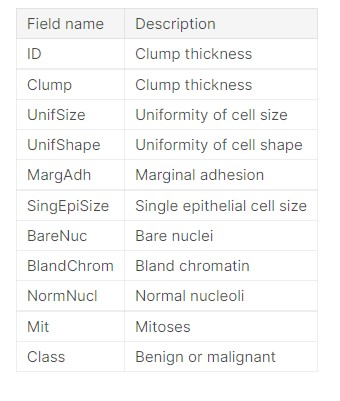

In [ ]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.shape

(699, 11)

In [ ]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

## Data pre-processing and selection


Let's first look at columns data types:


In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
df.shape

(699, 11)

In [ ]:
missing_data=df.isnull()

In [ ]:
missing_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("\n")

ID
False    699
Name: ID, dtype: int64


Clump
False    699
Name: Clump, dtype: int64


UnifSize
False    699
Name: UnifSize, dtype: int64


UnifShape
False    699
Name: UnifShape, dtype: int64


MargAdh
False    699
Name: MargAdh, dtype: int64


SingEpiSize
False    699
Name: SingEpiSize, dtype: int64


BareNuc
False    699
Name: BareNuc, dtype: int64


BlandChrom
False    699
Name: BlandChrom, dtype: int64


NormNucl
False    699
Name: NormNucl, dtype: int64


Mit
False    699
Name: Mit, dtype: int64


Class
False    699
Name: Class, dtype: int64




In [ ]:
df["Mit"].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mit, dtype: int64

In [ ]:
df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

It looks like the **BareNuc** column includes some values that are not numerical. We can drop those rows:


In [ ]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [ ]:
df['BareNuc']= df['BareNuc'].astype('float')

In [ ]:
avg_BareNuc=df["BareNuc"].mean()
df["BareNuc"].replace(np.nan,avg_BareNuc,inplace=True)

In [ ]:

df.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class            int64
dtype: object

In [ ]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(X)
X[0:5]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.]])

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.


In [ ]:
#df['Class'] = df['Class'].astype('int')
Y=df['Class']
Y = np.asarray(Y)
Y[0:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset


We split our dataset into train and test set:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (559, 9) (559,)
Test set: (140, 9) (140,)


In [ ]:
X_train[0:5]

array([[ 1.,  1.,  1.,  1., 10.,  1.,  1.,  1.,  1.],
       [10.,  9.,  7.,  3.,  4.,  2.,  7.,  7.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [ 3.,  6.,  4., 10.,  3.,  3.,  3.,  4.,  1.],
       [10.,  5., 10.,  3.,  5.,  8.,  7.,  8.,  3.]])

In [ ]:
Y_train[0:5]

array([2, 4, 2, 4, 4])

In [ ]:
X_test[0:5]

array([[ 7.,  2.,  4.,  1.,  3.,  4.,  3.,  3.,  1.],
       [ 8., 10., 10., 10.,  6., 10., 10., 10.,  1.],
       [ 5.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  3.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [10., 10.,  7.,  8.,  7.,  1., 10., 10.,  3.]])

In [ ]:
Y_test[0:5]

array([4, 4, 4, 2, 4])

In [ ]:
import seaborn as sns

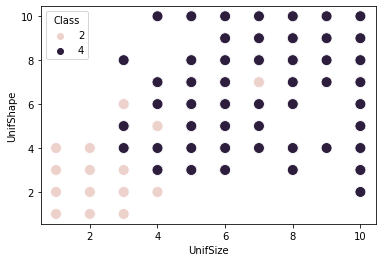

In [ ]:
sns.scatterplot(x=df["UnifSize"],y=df["UnifShape"],hue=df["Class"],s=120)

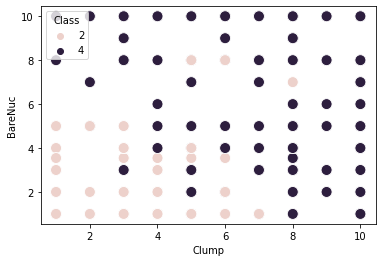

In [ ]:
sns.scatterplot(x=df["Clump"],y=df["BareNuc"],hue=df["Class"],s=120)

<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

SVC()

In [ ]:
X_train.shape

(559, 9)

In [ ]:
Y_test.shape

(140,)

In [ ]:
# Acuatl values
Y_test[0:5]

array([4, 4, 4, 2, 4])

After being fitted, the model can then be used to predict new values:


In [ ]:
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
y_pred [0:5]



 Predicted Values:



array([4, 4, 2, 2, 4])

In [ ]:
print("\n Actual Values:\n")
Y_test[0:5]

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))



 Actual Values:

Accuracy: 0.95


# **Knn Classification and Score evaluation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
print(knn.score(X_test,Y_test))

[2 4 2 2 4 2 2 4 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 2 4 2 4 4
 4 4 2 4 2 4 2 2 4 2 2 4 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 2 2 2 4 2 4 2 4 4 2
 2 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 4 2 2 2 4 2 2 4 2 4 4
 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 2]
0.9428571428571428


<h2 id="evaluation">Evaluation</h2>


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
classification_report(Y_test, y_pred,digits=2)

'              precision    recall  f1-score   support\n\n           2       0.98      0.95      0.96        91\n           4       0.90      0.96      0.93        49\n\n    accuracy                           0.95       140\n   macro avg       0.94      0.95      0.95       140\nweighted avg       0.95      0.95      0.95       140\n'

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[86,  5],
       [ 2, 47]])

You can also easily use the **f1\_score** from sklearn library:


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='weighted') 

0.9503235798440178

Let's try the jaccard index for accuracy:


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, y_pred, average='weighted')

0.9057048984468338